<a href="https://colab.research.google.com/github/PremKumar-V/NLP_Projects/blob/main/nlp_sentiment_analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [1]:
!mkdir ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 109MB/s]


In [5]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [6]:
train_file_name = '/content/data/train.tsv.zip'
test_file_name = '/content/data/test.tsv.zip'
sub_file_name = '/content/data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [7]:
import pandas as pd

In [8]:
raw_df = pd.read_csv(train_file_name, sep = '\t')

In [9]:
raw_df.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [10]:
raw_df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

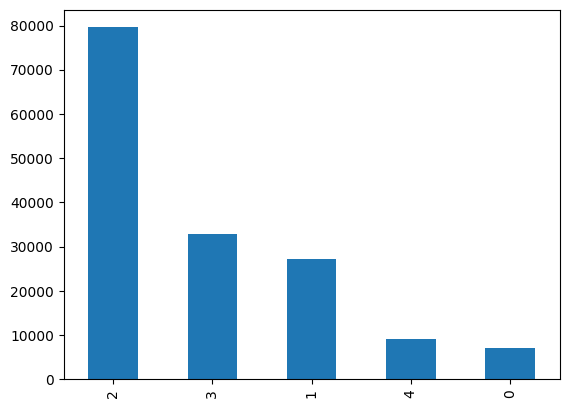

In [11]:
raw_df.Sentiment.value_counts().plot(kind = 'bar');

In [12]:
raw_df.SentenceId.value_counts()

1       63
5555    63
509     59
625     58
403     57
        ..
7572     1
4579     1
2392     1
2429     1
4982     1
Name: SentenceId, Length: 8529, dtype: int64

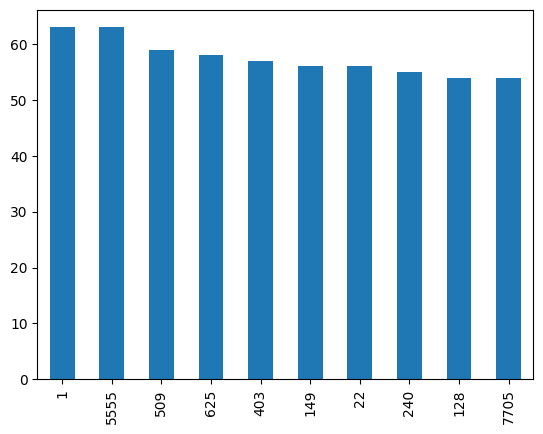

In [13]:
raw_df.SentenceId.value_counts()[:10].plot(kind = 'bar');

In [14]:
raw_df.SentenceId.value_counts(normalize = True)[:10]

1       0.000404
5555    0.000404
509     0.000378
625     0.000372
403     0.000365
149     0.000359
22      0.000359
240     0.000352
128     0.000346
7705    0.000346
Name: SentenceId, dtype: float64

In [15]:
test_df = pd.read_csv(test_file_name, sep = '\t')

In [16]:
sub_df = pd.read_csv(sub_file_name)

In [17]:
raw_df.isna().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

Summarize your insights and learnings from the dataset below:

* No `NULL` values.
* About `50%` of Data states neutral
* Most Phrase are from Sentence `1` and `5555`

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

- Use lemmentizer
- Don't remove pun and digits
- Play with Ngram
- Play with Maxfeatures

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')

stemmer = SnowballStemmer(language = 'english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [20]:
", ".join(tokenize(raw_df.Phrase[0]))

'a, seri, of, escapad, demonstr, the, adag, that, what, is, good, for, the, goos, is, also, good, for, the, gander, some, of, which, occasion, amus, but, none, of, which, amount, to, much, of, a, stori'

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
from nltk.corpus import stopwords

nltk.download('stopwords')

eng_stopwords = stopwords.words('english')

", ".join(eng_stopwords[:116])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such"

In [23]:
selected_stopword = eng_stopwords[:116]

In [24]:
vectorizer = TfidfVectorizer(
                tokenizer = tokenize,
                stop_words = selected_stopword,
                ngram_range = (1, 2),
                max_features = 2000
)

In [25]:
%%time

vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 38.6 s, sys: 181 ms, total: 38.8 s
Wall time: 49.1 s


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f0f0a300550>)

In [26]:
len(vectorizer.vocabulary_)

2000

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [27]:
inputs = vectorizer.transform(raw_df.Phrase)

In [28]:
print(f"Inputs Shape:\n {inputs.shape}")
print(f"Inputs: \n {inputs[0][0]}")

Inputs Shape:
 (156060, 2000)
Inputs: 
   (0, 1672)	0.21408521714408968
  (0, 1526)	0.30145661993985357
  (0, 1198)	0.3211173167333267
  (0, 1172)	0.32797654561417583
  (0, 1132)	0.23186254293562117
  (0, 752)	0.45518904348233324
  (0, 428)	0.3469546157168364
  (0, 67)	0.2931497881816512
  (0, 66)	0.33022324748049126
  (0, 54)	0.2762018818511685


In [29]:
test_inputs = vectorizer.transform(test_df.Phrase)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [30]:
TRAIN_SIZE = 110000

In [31]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [32]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model1 = LogisticRegression()

In [35]:
model1.fit(train_inputs, train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
train_preds = model1.predict(train_inputs)

In [38]:
accuracy_score(train_preds, train_targets)

0.6377363636363637

### Study Predictions on Sample Inputs

In [39]:
val_preds = model1.predict(val_inputs)

In [40]:
accuracy_score(val_preds, val_targets)

0.5788753799392097

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
lg_params = {
    'solver' : ["newton-cg", "sag", "saga", "lbfgs"]
}

In [43]:
grid_lg = LogisticRegression(n_jobs = -1, random_state = 4)

In [44]:
grid_lg_search = GridSearchCV(verbose = 2, cv = 5, n_jobs = -1, estimator = grid_lg, param_grid = lg_params)

grid_lg_search.fit(train_inputs, train_targets)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=4),
             n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             verbose=2)

In [45]:
pd.DataFrame(grid_lg_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.393747,0.728237,0.006254,0.000463,newton-cg,{'solver': 'newton-cg'},0.600727,0.589500,0.589091,0.593545,0.595136,0.593600,0.004250,2
1,2.940565,0.625843,0.005564,0.000794,sag,{'solver': 'sag'},0.600727,0.589500,0.589091,0.593545,0.595136,0.593600,0.004250,2
2,2.953532,0.737652,0.005065,0.000214,saga,{'solver': 'saga'},0.600727,0.589500,0.589091,0.593591,0.595136,0.593609,0.004250,1
3,4.008325,0.798397,0.005405,0.000803,lbfgs,{'solver': 'lbfgs'},0.601909,0.589545,0.588545,0.592909,0.594455,0.593473,0.004736,4


In [46]:
grid_lg_search.best_score_

0.593609090909091

In [47]:
final_lg_model = grid_lg_search.best_estimator_

In [48]:
accuracy_score(final_lg_model.predict(train_inputs), train_targets)

0.6388818181818182

In [49]:
accuracy_score(final_lg_model.predict(val_inputs), val_targets)

0.579244463742944

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score



In [50]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 181288 stored elements in Compressed Sparse Row format>

In [51]:
test_preds = final_lg_model.predict(test_inputs)

In [52]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [53]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [54]:
sub_df.Sentiment = test_preds

In [55]:
sub_df.to_csv('LogRegSubmission.csv', index = None)

## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional:
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips:

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1 Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model2 = RandomForestClassifier(n_jobs = -1, random_state = 4, max_features = 'log2', criterion = 'entropy')

In [58]:
model2.fit(train_inputs, train_targets)

RandomForestClassifier(criterion='entropy', max_features='log2', n_jobs=-1,
                       random_state=4)

In [59]:
accuracy_score(model2.predict(train_inputs), train_targets)

0.7898818181818181

In [60]:
accuracy_score(model2.predict(val_inputs), val_targets)

0.5597264437689969

In [61]:
test_preds = model2.predict(test_inputs)

sub_df.Sentiment = test_preds

sub_df.to_csv('RandomForestSubmission.csv', index = None)

### Model 2 Naive Bayes

In [62]:
from sklearn.svm import SVC

In [63]:
model3 = SVC(kernel = 'poly', random_state = 4)

In [64]:
model3.fit(train_inputs, train_targets)

SVC(kernel='poly', random_state=4)

In [65]:
accuracy_score(model3.predict(train_inputs), train_targets)

0.7692454545454546

In [66]:
accuracy_score(model3.predict(val_inputs), val_targets)

0.5189535388623534

In [67]:
test_preds = model3.predict(test_inputs)

sub_df.Sentiment = test_preds

sub_df.to_csv('SVMSubmission.csv', index = None)

# Conclusion - Best Score

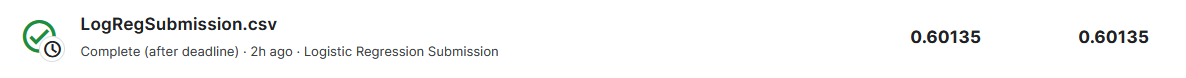

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
